<a href="https://colab.research.google.com/github/himanshu302002/ML-Regression-/blob/main/(Capstone_Project)ML_Regression_on_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GitHub Link -**

https://github.com/himanshu302002/ML-Regression-.git

# **Project Name**    - 



##### **Project Type**    - ML Regression on Retail Sales Prediction
##### **Contribution**    - Individual(Himanshu Goel)


# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


DATA DESCRIPTION

### <b>Rossmann Stores Data.csv </b> - historical data including Sales

### <b>store.csv </b> - supplemental information about the stores
### Almost all of the fields are self-explanatory. The following is the  descriptions for those that aren't.


* #### Id - an Id that represents a (Store, Date) duple within the test set

* #### Store - a unique Id for each store

* #### Sales - the turnover for any given day (this is what you are predicting)

* #### Customers - the number of customers on a given day

* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open

* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

* #### StoreType - differentiates between 4 different store models: a, b, c, d

* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended

* #### CompetitionDistance - distance in meters to the nearest competitor store

* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

* #### Promo - indicates whether a store is running a promo on that day

* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




Importing Necessary Pyhton Libraries

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6


import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet




**Loading DATA**

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Dataset**

In [ ]:
#Loading Rossman Dataset
rossman_df = pd.read_csv('Rossmann Stores Data.csv' )

<ipython-input-8-a3e3d67ad0d4>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df = pd.read_csv('Rossmann Stores Data.csv' )


In [ ]:
# Loading Store Dataset
store_df = pd.read_csv('store.csv')

**Let us Start by Analysing The Rossmann Dataset**

In [10]:
rossman_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
rossman_df.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


**Necessary Information Analysis About Dataset**

In [12]:
rossman_df.shape


(1017209, 9)

Our dataset have 9 columns and more than a million rows

In [13]:
#Checking info of data 
rossman_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


 7 columns have integer and 2 columns have string as data type in our dataset

In [14]:
#Checking Null Values
rossman_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values in our dataset

**Dataset Summary in Statistical Form**

In [15]:
rossman_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
# Finding No. Of Stores in the Dataset
rossman_df.Store.nunique()


1115

In [17]:
# Finding Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

**Figuring out timeframe of our dataset**

In [18]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')


2013-01-01 initial
2015-07-31 final


**From 2013 to 2015 so we have a dataset of around 3 years.**

**Converting our Datatype**

In [20]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)


In [21]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


**Doing EDA On our Rossmann Dataset**

**Let us Create a Heatmap**

<ipython-input-22-8728f8903ebb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = rossman_df[rossman_df.columns].corr()


<Axes: >

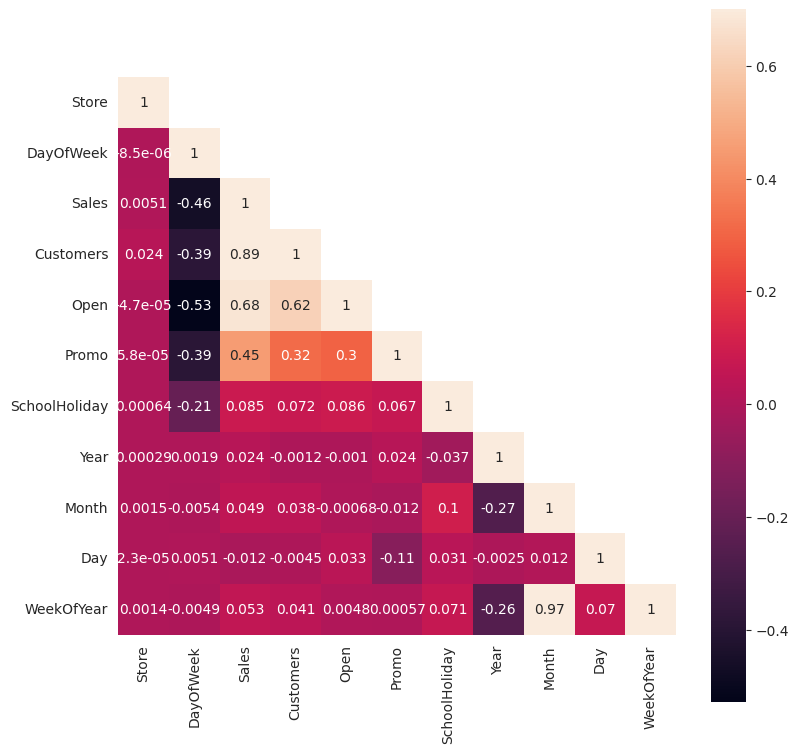

In [22]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)


**Let us Figure out Closing Dates of Our Store**

<Axes: xlabel='DayOfWeek', ylabel='count'>

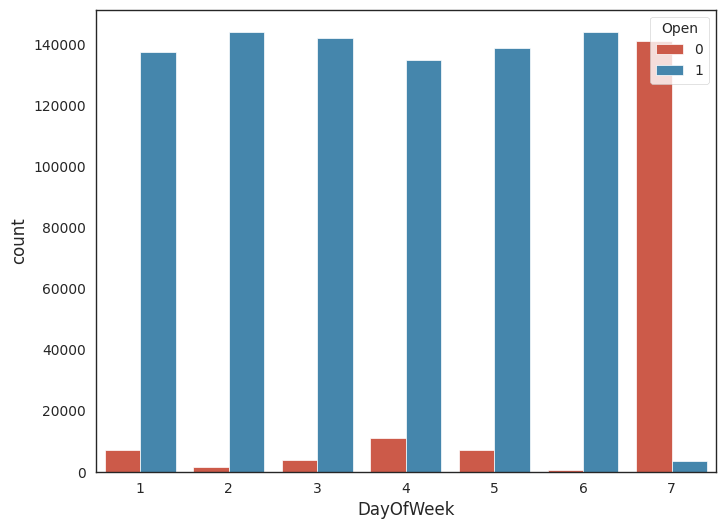

In [23]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)


Our Store Mostly Remains Closed At Sunday 

**Impact of Promo on Sales**

<Axes: xlabel='Promo', ylabel='Sales'>

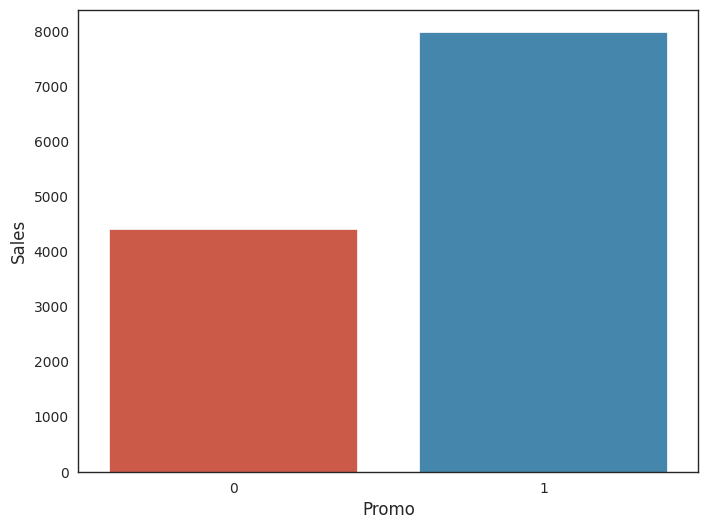

In [24]:
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])


When Promo is Running Sales are almost Double

**Monthly Sales Prediction**

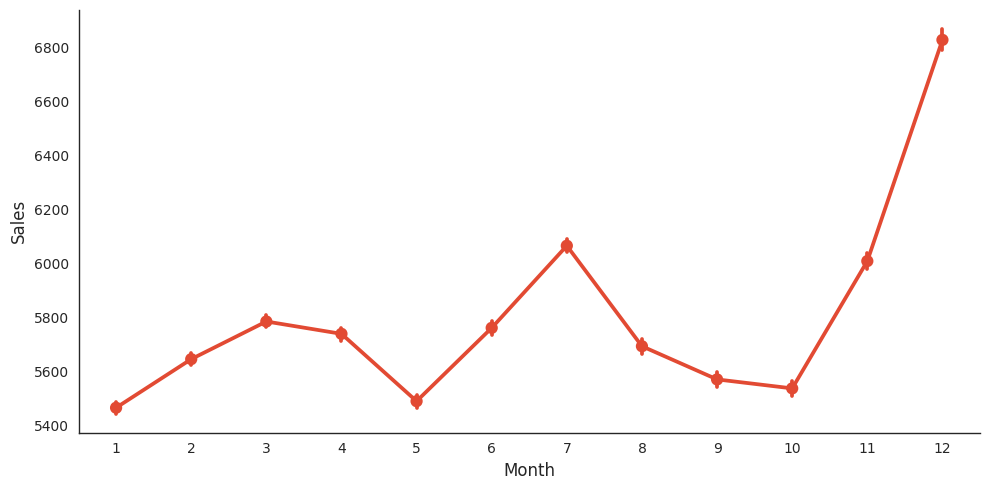

In [28]:

sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2)


After July sales starts to drop and Increase at November and reaches its Peak at around Christmas eve.

**Value Counts of School Holiday**

In [29]:
rossman_df.SchoolHoliday.value_counts()


0    835488
1    181721
Name: SchoolHoliday, dtype: int64

**Sales Affected by School Holiday**

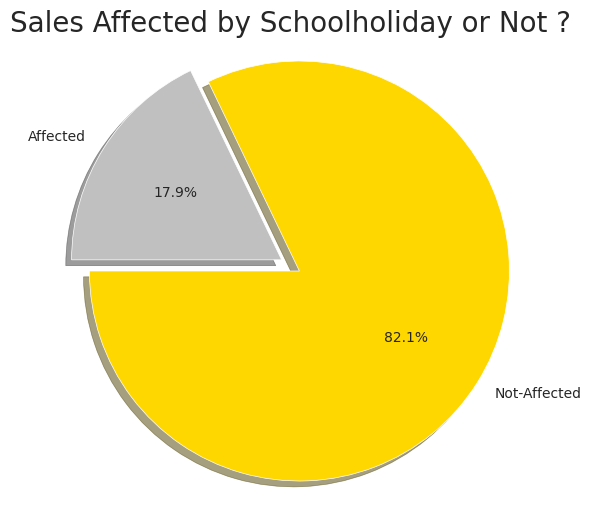

In [30]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


Sales affected by school holiday is less than 20 percent so we can say that school holiday does not necessarily reduce sales percentage

**Converting State Holiday Variable**

In [31]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})


In [32]:
rossman_df.StateHoliday.value_counts()


0    986159
1     31050
Name: StateHoliday, dtype: int64

**Impact of State Holiday on Sales**

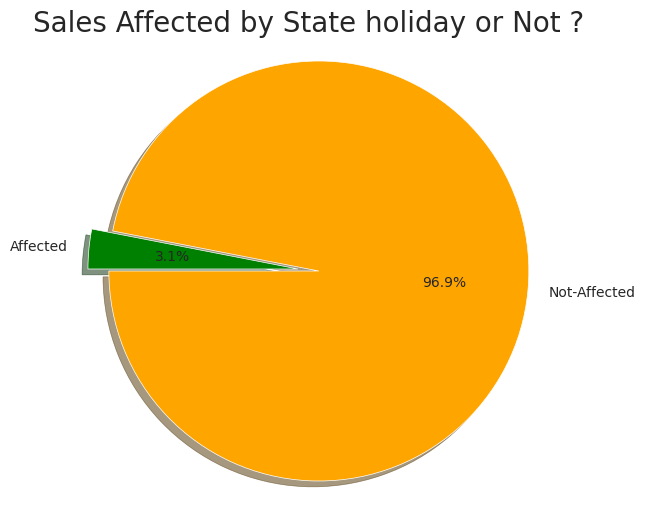

In [35]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


**Sales affected by State holiday is around 3 percent so it would be safe to say state holiday does not affect sales**

In [36]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)


Dropped the Column because it does not have an impact on our dataset.